In [21]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def __str__(self):
        return str(self.value)

In [22]:
def print_preorder(node):
    print(node.value, end=", ")

    if node.left != None:
        print_preorder(node.left)

    if node.right != None:
        print_preorder(node.right)

In [23]:
def add(node, value):
    if node == None:
        return Node(value)

    if node.value == value:
        raise Exception("Already added.")

    if value < node.value:
        node.left = add(node.left, value)
        return node

    if value > node.value:
        node.right = add(node.right, value)
        return node

In [24]:
tree = Node(10)
node_l = Node(2)
node_r = Node(15)
tree.left = node_l
tree.right = node_r

node_ll = Node(1)
node_lr = Node(5)
node_l.left = node_ll
node_l.right = node_lr

node_rl = Node(13)
node_rr = Node(20)
node_r.left = node_rl
node_r.right = node_rr

node_lrl = Node(4)
node_lrr = Node(7)
node_lr.left = node_lrl
node_lr.right = node_lrr

# tree = Node(5)
# node_l = Node(2)
# node_r = Node(10)
# tree.left = node_l
# tree.right = node_r

# node_ll = Node(1)
# node_l.left = node_ll

# node_rl = Node(7)
# node_rr = Node(13)
# node_r.left = node_rl
# node_r.right = node_rr


print_preorder(tree)

10, 2, 1, 5, 4, 7, 15, 13, 20, 

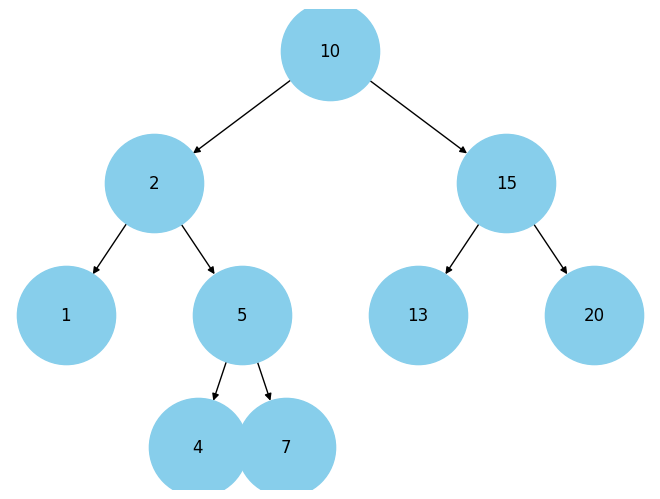

In [25]:
import matplotlib.pyplot as plt
import networkx as nx


def draw_tree(
    tree, parent_name, graph, pos=None, level=0, width=2.0, vert_gap=0.4, xcenter=0.5
):
    if pos is None:
        pos = {parent_name: (xcenter, 1 - level * vert_gap)}
    else:
        pos[parent_name] = (xcenter, 1 - level * vert_gap)

    neighbors = list(graph.neighbors(parent_name))
    if len(neighbors) != 0:
        dx = width / 2
        nextx = xcenter - width / 2 - dx / 2
        for neighbor in neighbors:
            nextx += dx
            pos = draw_tree(
                tree,
                neighbor,
                graph=graph,
                pos=pos,
                level=level + 1,
                width=dx,
                xcenter=nextx,
            )
    return pos


def build_networkx_tree(tree, graph, parent=None):
    if tree is not None:
        graph.add_node(tree.value)
        if parent:
            graph.add_edge(parent, tree.value)
        if tree.left:
            build_networkx_tree(tree.left, graph, tree.value)
        if tree.right:
            build_networkx_tree(tree.right, graph, tree.value)


# Build networkx graph
G = nx.DiGraph()
build_networkx_tree(tree, G)

# Draw the tree
pos = draw_tree(tree, tree.value, G)
labels = {k: k for k, v in pos.items()}
nx.draw(
    G, pos=pos, labels=labels, with_labels=True, node_size=5000, node_color="skyblue"
)
plt.show()